<a href="https://colab.research.google.com/github/pabloapablaza/StyleTransfer/blob/main/Plot_Matrix_ST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importar librerias
import os
import tensorflow as tf
import IPython.display as display
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import PIL.Image
import time
import functools
from google.colab import files
import time
from PIL import Image
import requests

###**Funciones imagenes**

In [2]:
def tensor_to_image(tensor):

  """Funcion que permite pasar de tensor (4D) a imagen (3D).
  Se reducen las dimensiones de la imagen y se multiplica por 255 el
  valor del tensor para pasar a valores RGB"""

  tensor = tensor*255
  tensor = np.array(tensor, dtype=np.uint8)

  if np.ndim(tensor)>3:
    assert tensor.shape[0] == 1
    tensor = tensor[0]
    
  return PIL.Image.fromarray(tensor)

In [3]:
def load_img(path):

  """Carga las imagenes especificadas en path y reescala con tal 
  que la dimension mas larga sea de 512px"""

  max_dim = 512
  img = tf.io.read_file(path)
  img = tf.image.decode_image(img, channels = 3)
  img = tf.image.convert_image_dtype(img, tf.float32) #antes path era img

  shape = tf.cast(tf.shape(img)[:-1], tf.float32)
  long_dim = max(shape)
  scale = max_dim / long_dim

  new_shape = tf.cast(shape * scale, tf.int32)

  img = tf.image.resize(img, new_shape)
  img = img[tf.newaxis, :]
  return img

In [4]:
def plot_img(image, title=None):

  """Funcion para graficar las imagenes cargadas"""

  if len(image.shape) > 3:
    image = tf.squeeze(image, axis=0)

  plt.imshow(image)
  if title:
    plt.title(title)

In [5]:
def plot_pairs(content, style, dims):

  """Grafica pares de imagenes para mostrar contenido y estilo juntos con la dimension
  especificada"""

  if content !=None and style!=None:
    plt.figure(figsize = (dims, dims))

    plt.subplot(1, 2, 1)
    plot_img(content, 'Imagen de contenido')

    plt.subplot(1, 2, 2)
    plot_img(style, 'Imagen de estilo')

In [6]:
#cargar imagenes directamente desde url
content_url = 'https://i.imgur.com/EM5Q5A4.jpeg'
style_url = 'https://i.imgur.com/7IwhTBg.jpeg'
style_path = tf.keras.utils.get_file("style_1221", style_url, cache_dir='/content/')
content_path = tf.keras.utils.get_file("content_1221", content_url, cache_dir='/content/')

204800/197724 [===============================] - 0s 2us/step


In [8]:
content_img = load_img(content_path) #imagen de contenido
style_img = load_img(style_path)

In [24]:
s=[style_img[0],style_img[0],style_img[0]]#],content_img[0]]#,content_img[0]] #primera fila
c=[content_img[0],style_img[0],content_img[0],content_img[0],content_img[0]]#,content_img[0],style_img[0]]

In [68]:
columns = len(s)+1
rows = len(c)+1

In [69]:
[k for k in range(columns+1,(columns)*(rows)-1,columns)]

[6, 11, 16, 21]

In [18]:
len(s)-1

2

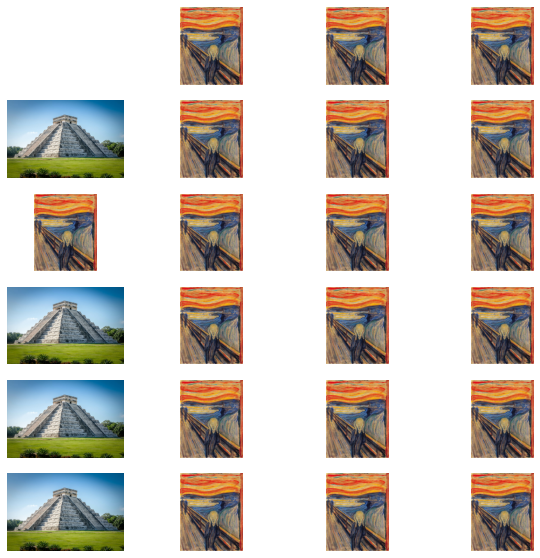

In [22]:
columns = len(s)+1
rows = len(c)+1
n = columns*rows
fig = plt.figure(figsize=(10, 10))

index_cont = [k for k in range(columns+1,(columns)*(rows)-1,columns)]

for i in range(1,columns+1): #Imagenes de estilo
  if i==1:
    None
  else:
    plt.subplot(rows,columns,i)
    plot_img(s[i-2])
    plt.axis('off')
cont=0
s_row=0
for j in range(columns+1, n+1): #Imagenes de contenido y transferidas
  if j in index_cont:
    plt.subplot(rows,columns,j)
    plot_img(c[cont])
    plt.axis('off')
    
  else: #otros valores de j
    if s_row < len(s)-1: #antes de llegar al extremo
      plt.subplot(rows,columns,j)
      plot_img(s[s_row])
      plt.axis('off')
      s_row+=1 #se avanza en estilo
    else: #ultimo valor
      plt.subplot(rows,columns,j)
      plot_img(s[s_row])
      plt.axis('off')
      s_row=0 #se reinician los estilos
      cont+=1 #se avanza 1 en contenido

#col_1=columns+1
#for cont in c: #Imagenes de contenido
 # plt.subplot(rows,columns,col_1)
  #plot_img(cont)
  #plt.axis('off')
  #col+=columns


In [ ]:
columns = len(s)+1
rows = len(c)+1
n = columns*rows
fig = plt.figure(figsize=(10, 10))

index_cont = [k for k in range(columns+1,(columns)*(rows)-1,columns)]

for i in range(1,columns+1): #Imagenes de estilo
  if i==1:
    None
  else:
    plt.subplot(rows,columns,i)
    plot_img(s[i-2])
    plt.axis('off')
cont=0
s_row=0
for j in range(columns+1, n+1): #Imagenes de contenido y transferidas
  if j in index_cont:
    plt.subplot(rows,columns,j)
    plot_img(c[cont])
    plt.axis('off')
  else: #otros valores de j
    if s_row < len(s)-1: #antes de llegar al extremo
      plt.subplot(rows,columns,j)
      plot_img(s[s_row])
      plt.axis('off')
      s_row+=1 #se avanza en estilo
    else: #ultimo valor
      plt.subplot(rows,columns,j)
      plot_img(s[s_row])
      plt.axis('off')
      s_row=0 #se reinician los estilos
      cont+=1 #se avanza 1 en contenido

In [ ]:
nrocol=8%columns
nrofila=int(8/columns)*columns+1
style_idx=nrocol-2
cont_idx=index_cont.index(nrofila)

In [35]:
7%columns

3

ValueError: ignored

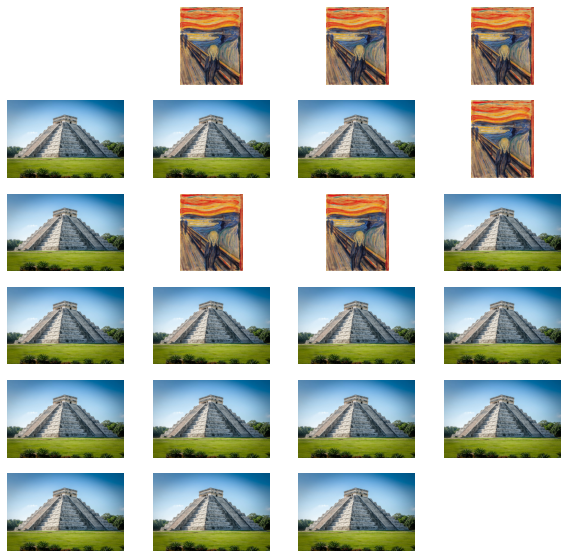

In [25]:
columns = len(s)+1
rows = len(c)+1
n = columns*rows
fig = plt.figure(figsize=(10, 10))

index_cont = [k for k in range(columns+1,(columns)*(rows)-1,columns)]

for i in range(1,columns+1): #Imagenes de estilo
  if i==1:
    None
  else:
    plt.subplot(rows,columns,i)
    plot_img(s[i-2])
    plt.axis('off')
cont=0
s_row=0
for j in range(columns+1, n+1): #Imagenes de contenido y transferidas
  if j in index_cont:
    plt.subplot(rows,columns,j)
    plot_img(c[cont])
    plt.axis('off')
  else:
    if j%columns==0:
      nrocol= columns
    else:
      nrocol= j%columns
      nrofila= int(j/columns)*columns +1
      styleindex= nrocol-2
      contentindex= index_cont.index(nrofila)
      styleimg= s[styleindex]
      contentimg= c[contentindex]

    invocar funcion transferencia


In [32]:
columns

4

In [43]:
if 8%columns==0:
  nrocol= columns
else:
  nrocol= 8%columns
  nrofila= int(8/columns)*columns +1
  styleindex= nrocol
  contentindex= index_cont.index(nrofila)-1
  #styleimg= s[styleindex]
  #contentimg= c[contentindex]

In [45]:
contentindex

1

In [33]:
nrocol= 8%(columns+1)
nrofila = int(8/columns)*columns +1
styleindex = nrocol-2
contentindex = index_cont.index(nrofila)

styleindex

1

In [29]:
nrofila

9

In [ ]:
else:
  nrocol= j%columns
  nrofila= int(j/columns)*columns +1
  styleindex= nrocol-2
  contentindex= index_cont.index(nrofila)
  styleimg= s[styleindex]
  contentimg= c[contentindex]
  invocar funcion transferencia


In [34]:
for cont in c: #Imagenes de contenido
  print(1)

1
1
1


In [31]:
rows

4

In [30]:
columns+1

5

In [23]:
for i in range(1,columns+1):
  print(i)

1
2
3
4


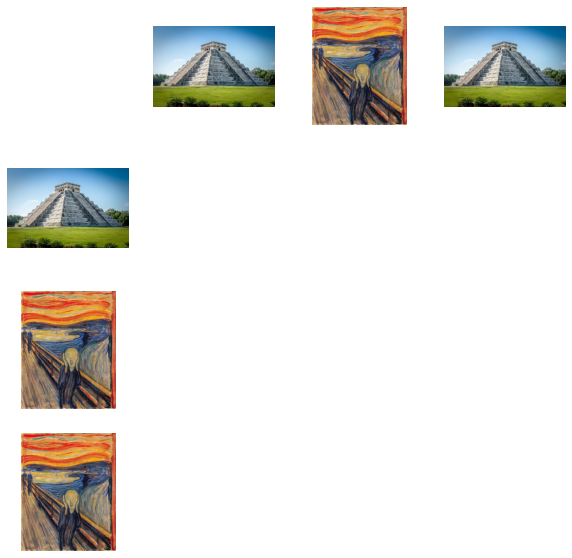

In [21]:
columns = len(s)+1
rows = len(c)+1
n=columns*rows
fig=plt.figure(figsize=(10, 10))

plt.subplot(rows,columns,2)
plot_img(s[0])
plt.axis('off')

plt.subplot(rows,columns,3)
plot_img(s[1])
plt.axis('off')

plt.subplot(rows,columns,4)
plot_img(s[2])
plt.axis('off')

plt.subplot(rows,columns,5)
plot_img(c[0])
plt.axis('off')

plt.subplot(rows,columns,9)
plot_img(c[1])
plt.axis('off')

plt.subplot(rows,columns,13)
plot_img(c[2])
plt.axis('off')


plt.show()


(-0.5, 409.5, 511.5, -0.5)

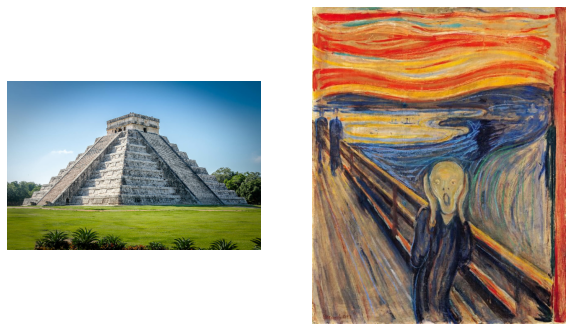

In [12]:
plt.figure(figsize = (10, 10))
plt.subplot(1, 2, 1)
plot_img(content_img)
plt.axis('off')
plt.subplot(1, 2, 2)
plot_img(style_img)
plt.axis('off')

In [ ]:
def plot_matrix

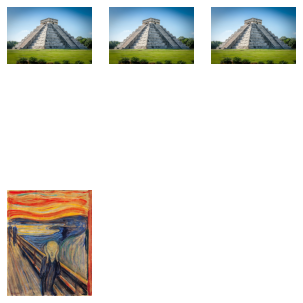

In [19]:
columns = 4
rows = 2
fig=plt.figure(figsize=(7, 7))
fig.add_subplot(rows, columns, 1)
plt.imshow(s[0])
plt.axis('off')
fig.add_subplot(rows, columns, 2)
plt.imshow(s[0])
plt.axis('off')
fig.add_subplot(rows, columns, 3)
plt.imshow(s[0])
plt.axis('off')
fig.add_subplot(rows, columns, 5)
plt.imshow(s[1])
plt.axis('off')


plt.show()

2
2
3
3


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  app.launch_new_instance()


IndexError: ignored

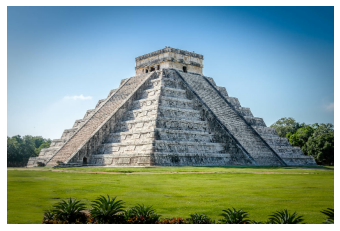

In [ ]:
columns=len(s)+1
filas=len(c)+1
n=filas*columns #cantidad de casillas
for i in range(1,n+1): #contar de 1 hasta n casillas
  if i == 1: #Elemento vacio
    None
  elif i == s_count and i<columns: #Primera fila con puros estilos
    fig.add_subplot(rows, columns, i)
    plt.imshow(s[i-2])
    plt.axis('off')
    s_count+=1
  elif (i-1)//columns == 1: #Primera columna
    fig.add_subplot(rows, columns, i)
    plt.imshow(c[i-2])
    plt.axis('off')
  else:
    None

plt.show()

In [ ]:
columns

3

In [ ]:
for i in range(1,n+1): #contar de 1 hasta n casillas
  print(i)

1
2
3
4
5
6
7
8
9


In [ ]:
[j for j in range(2,columns+1)]

[2, 3]

IndexError: ignored

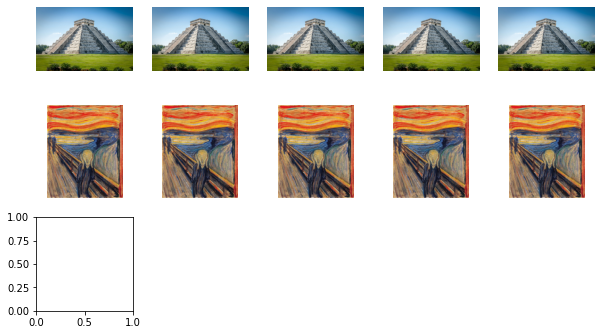

In [ ]:
fig=plt.figure(figsize=(10, 10))
columns = 5
rows = 5
for i in range(1, columns*rows +1):
    #if i==1:
      #None
    #else:
    fig.add_subplot(rows, columns, i)
    plt.imshow(a[(i-1)//4])
    plt.axis('off')
plt.show()

###**Cargar de url**

In [ ]:
url_1 = 'https://i.imgur.com/EM5Q5A4.jpeg' #contenido
url_2 = 'https://i.imgur.com/7IwhTBg.jpeg' #estilo

In [ ]:
style_path

'/content/datasets/style_1'

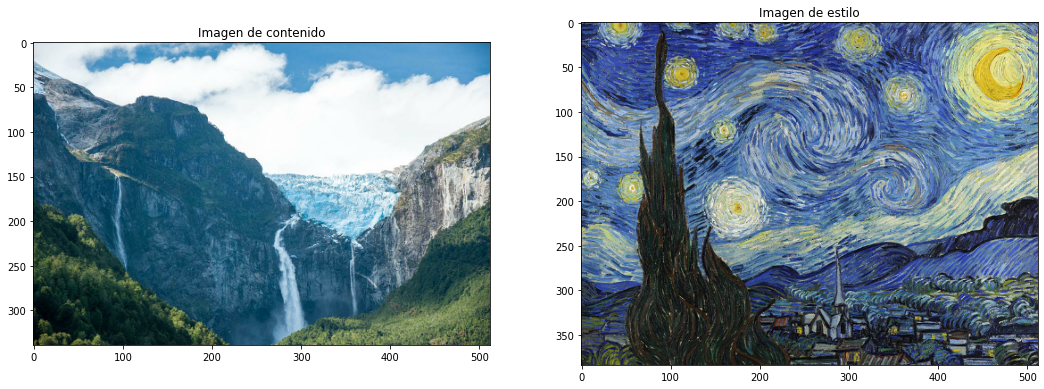

In [ ]:
content_img = load_img(content_path) #imagen de contenido
style_img = load_img(style_path) #imagen de estilo
plot_pairs(content_img, style_img, 18) #graficar imagen de contenido y estilo